In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,41.5,20.0,186,3450,NaN
4,Adelie,Torgersen,36.7,19.3,193,3450,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207,4000,male
340,Chinstrap,Dream,43.5,18.1,202,3400,female
341,Chinstrap,Dream,49.6,18.2,193,3775,male
342,Chinstrap,Dream,50.8,19.0,210,4100,male


In [3]:
# Drop two columns you don't want (like island and sex instead of SepalLength/Width)
df = df.drop(['island', 'Gender'], axis=1)

# Drop target label 'species' (like Iris 'Species') to keep only numeric features
data = df.drop(['species'], axis=1)
data


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,41.5,20.0,186,3450
4,36.7,19.3,193,3450
...,...,...,...,...
339,55.8,19.8,207,4000
340,43.5,18.1,202,3400
341,49.6,18.2,193,3775
342,50.8,19.0,210,4100


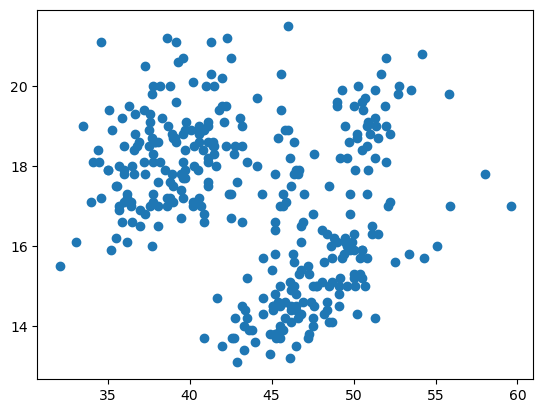

In [4]:
plt.scatter(data.bill_length_mm, data.bill_depth_mm)

In [5]:
S = MinMaxScaler()
data = S.fit_transform(data)
data

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111]])

In [6]:
data = pd.DataFrame(data, columns=['A','B','C','D'])
data

,A,B,C,D
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.341818,0.821429,0.237288,0.208333
4,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111
340,0.414545,0.595238,0.508475,0.194444
341,0.636364,0.607143,0.355932,0.298611
342,0.680000,0.702381,0.644068,0.388889


In [7]:
model = KMeans(n_clusters=2)
model.fit(data)

D:\Anaconda_Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda_Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

KMeans(n_clusters=2)

In [8]:
y = model.fit_predict(data)
y

D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
data['cluster'] = y
data

,A,B,C,D,cluster
0,0.254545,0.666667,0.152542,0.291667,0
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
3,0.341818,0.821429,0.237288,0.208333,0
4,0.167273,0.738095,0.355932,0.208333,0
...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,0
340,0.414545,0.595238,0.508475,0.194444,0
341,0.636364,0.607143,0.355932,0.298611,0
342,0.680000,0.702381,0.644068,0.388889,0


In [10]:
cent=model.cluster_centers_
cent

array([[0.35664463, 0.62819264, 0.33474576, 0.28042929],
       [0.55958944, 0.22311828, 0.76558229, 0.65987903]])

<Axes: xlabel='A', ylabel='B'>

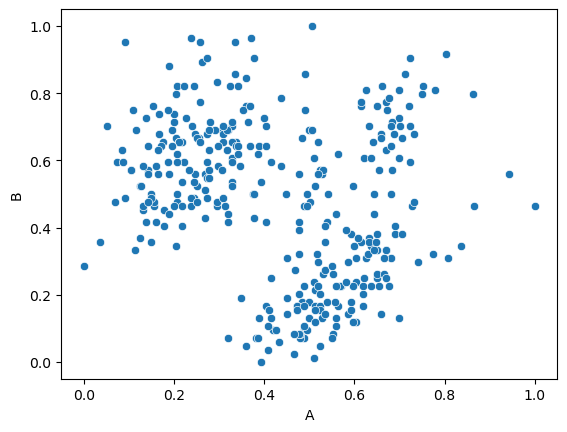

In [11]:
Counter(model.labels_)
Counter({1 : 50, 0 : 100})
sns.scatterplot(data=data, x='A', y='B')

<Axes: xlabel='A', ylabel='B'>

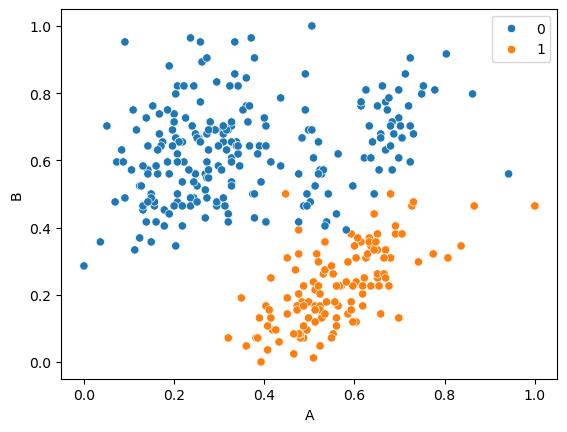

In [12]:
sns.scatterplot(data=data, x='A', y='B', hue=model.labels_)


In [13]:
K_rng=range(1,11)
Sse=[ ]
for K in K_rng:
	km = KMeans(n_clusters=K)
	km.fit(data[['A','B']])
	Sse.append(km.inertia_)

Sse

D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[32.55392565255938,
 15.865326900992764,
 9.038060598227638,
 6.897320808179828,
 5.225570920893499,
 4.4167790537396545,
 3.7991439929212842,
 3.393708362388214,
 2.9726354150504046,
 2.9141243720536387]

In [14]:
df


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,41.5,20.0,186,3450
4,Adelie,36.7,19.3,193,3450
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207,4000
340,Chinstrap,43.5,18.1,202,3400
341,Chinstrap,49.6,18.2,193,3775
342,Chinstrap,50.8,19.0,210,4100
